<a href="https://colab.research.google.com/github/andrebelem/ASTOC/blob/main/SNIPPETS_An%C3%A1lise_de_S%C3%A9ries_Temporais_Bayesiana_com_o_PyMC_Markov_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Bayesiana de Séries Temporais usando PyMC

No campo da análise de dados, frequentemente nos deparamos com dados de séries temporais que contém características desconhecidas. Esses pontos de dados sequenciais indexados em ordem temporal carregam informações significativas que só podem ser descobertos através de tarefas analíticas.

A análise Bayesiana é uma técnica estatística poderosa que nos permite expressar incerteza sobre nossos modelos. Com a ajuda da análise Bayesiana, podemos construir e refinar nossos modelos à medida que mais dados se tornam disponíveis. A combinação da análise Bayesiana com séries temporais pode fornecer insights potentes.

Neste post, vamos percorrer um exemplo simples de realização de uma análise Bayesiana em dados de séries temporais usando PyMC, uma biblioteca Python para programação probabilística. Veja aqui https://www.pymc.io/welcome.html<br><br>
**Note** que o PyMC já vem instalado no Google Colab.

## Passo 1: Gerando Dados de Séries Temporais

Para simplicidade, vamos gerar alguns dados de séries temporais sintéticos. Vamos gerar uma função senoidal com algum ruído gaussiano.

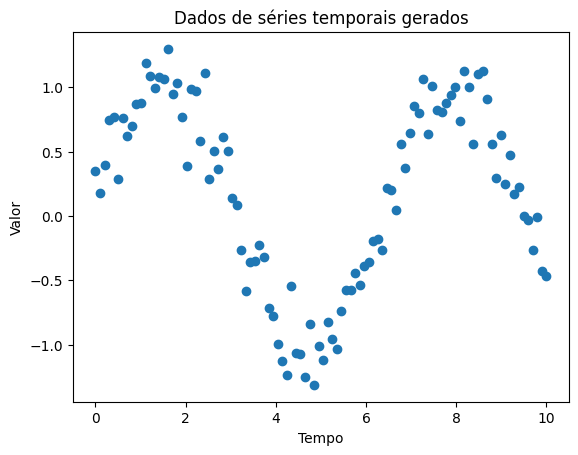

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

np.random.seed(0)
n_data_points = 100  # número de pontos de dados
x = np.linspace(0, 10, n_data_points)
y = np.sin(x) + np.random.normal(0, 0.2, size=n_data_points)

plt.plot(x, y, 'o')
plt.title('Dados de séries temporais gerados')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()


# Construindo o Modelo Bayesiano

Agora que temos nossos dados de séries temporais, vamos proceder com a análise Bayesiana. Usaremos um modelo simples aqui, onde estamos ajustando uma função senoidal mais algum ruído gaussiano (que é basicamente "como criamos a série"). Note que se você tem uma ideia das oscilações e suas frequências, é por ai que começamos sempre.

In [2]:
with pm.Model() as model:
    # Priors
    amplitude = pm.HalfNormal('amplitude', sigma=1)
    frequency = pm.Normal('frequency', mu=1, sigma=1)
    phase = pm.Uniform('phase', lower=0, upper=np.pi)
    noise_sd = pm.HalfNormal('noise_sd', sigma=1)

    # Valor esperado
    y_hat = amplitude * pm.math.sin(2 * np.pi * frequency * x + phase)

    # Verossimilhança
    y_obs = pm.Normal('y_obs', mu=y_hat, sigma=noise_sd, observed=y)

    # Amostragem
    trace = pm.sample(2000, tune=1000)


Definimos nossos priors e verossimilhança. Em seguida, amostramos a distribuição posterior dos parâmetros usando **Monte Carlo Markov Chain** (MCMC).

## Diagnósticos do Modelo

PyMC fornece funções integradas para diagnóstico de modelos e análise posterior. Podemos plotar o rastro de nossos parâmetros e visualizar as distribuições posteriores.

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


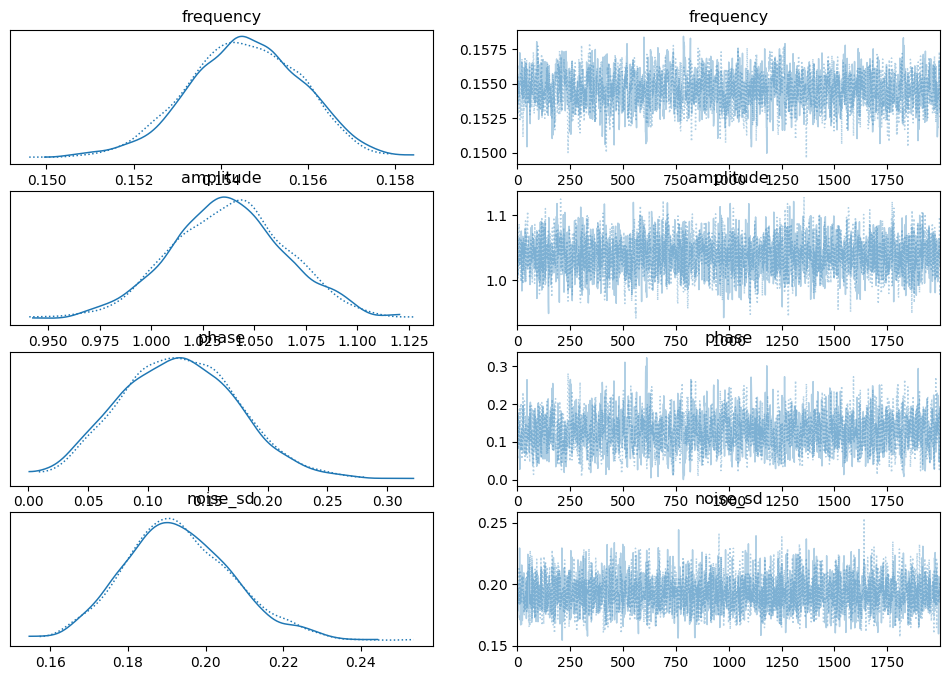

In [3]:
pm.plot_trace(trace)
plt.show()

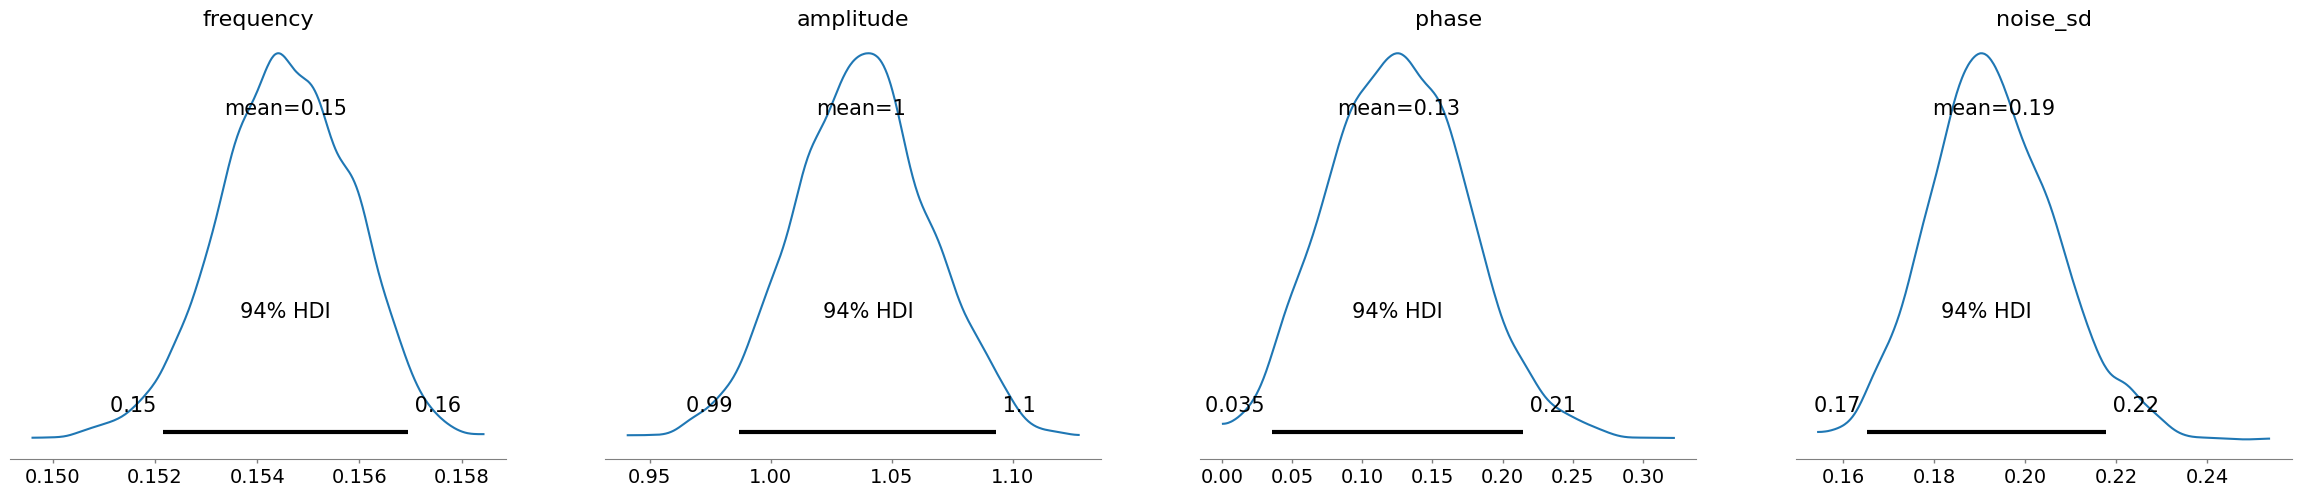

In [4]:
pm.plot_posterior(trace)
plt.show()

E agora plotando nossas estimativas...

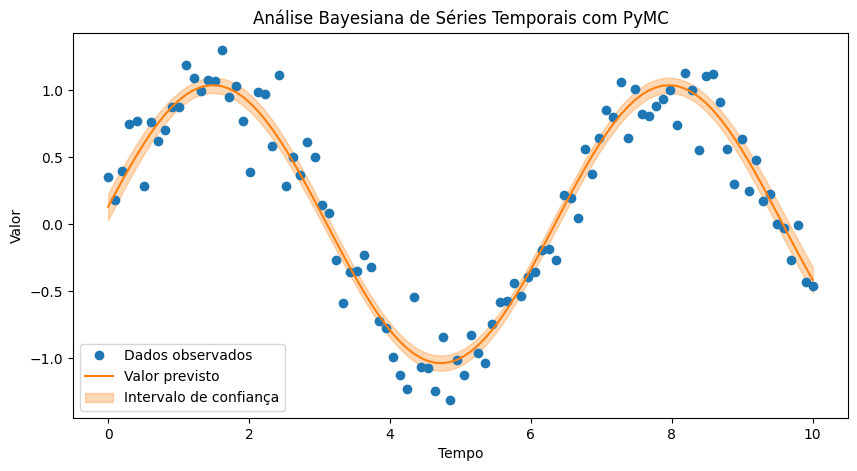

In [5]:
# Obter amostras posteriores
amplitude_samples = trace.posterior['amplitude'].values
frequency_samples = trace.posterior['frequency'].values
phase_samples = trace.posterior['phase'].values

# Adicionar um novo eixo para x
x_new = x[None, None, :]

# Gerar valores previstos
y_hat = amplitude_samples[..., None] * np.sin(2 * np.pi * frequency_samples[..., None] * x_new + phase_samples[..., None])

# Calcular média e desvio padrão ao longo dos dois primeiros eixos (cadeias e amostras)
y_hat_mean = y_hat.mean(axis=(0, 1))
y_hat_std = y_hat.std(axis=(0, 1))
# Plotagem
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='Dados observados')
plt.plot(x, y_hat_mean, color='C1', label='Valor previsto')
plt.fill_between(x, y_hat_mean - 2*y_hat_std, y_hat_mean + 2*y_hat_std, color='C1', alpha=0.3, label='Intervalo de confiança')
plt.title('Análise Bayesiana de Séries Temporais com PyMC')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


Este é um exemplo simples para demonstrar como podemos utilizar análise Bayesiana para entender dados de séries temporais "à priori". Ao especificar nossas hipóteses por meio de priors e atualizar essas hipóteses com base em dados observados, a análise Bayesiana fornece um poderoso framework para aprendizado a partir de dados. Com PyMC, o processo se torna muito mais fácil e intuitivo, permitindo que nos concentremos mais na construção do modelo e na interpretação.

Lembre-se, a qualidade da análise Bayesiana depende muito dos priors e do modelo escolhidos. Portanto, ter conhecimento do domínio pode levar a priors mais sensatas e produzir resultados mais precisos e interpretáveis.